In [1]:
# Libraries that this notebook will use:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
# Helps the maps display nicely in the notebook:
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 20]
# Tells the notebook not to display warnings:
import warnings
warnings.filterwarnings('ignore')

# Working with and visualizing large datasets
- Dealing with missing values
- Filtering and selecting for certain rows and columns with ```.iloc[]``` and ```.loc[]```
- Grouping data by specific attributes with ```.groupby()```
- Working with temporal and categorial data and plotting lineplots and barplots
- Reviewing list comprehensions
- Merging two dataframes with ```.merge()```
- Plotting chloropleth maps with GeoPandas

## Data cleaning

Today we're going to extend our Pandas and Geopandas knowledge to manipulate and visualize an existing large dataset. This dataset is a random sample of tweets collected over time (2012 to 2015) in Alameda County. The most relevant columns are the tweet ID, user ID, latitude, longitude, date, and census tract number.

First, we need to clean the data. This data is relatively clean, but some columns have missing values, which may be problematic when you're trying to visualize, analyze, or model the data. There are many ways to deal with missing values, but today we're going to go over one: simply getting rid of them.

Now, let's read in the data (from a .csv file) into Pandas. We'll call the variable for the dataframe ```tweets```.

In [78]:
tweets = pd.read_csv("tweets.csv")
tweets.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,u_id,lat,lon,date,tract,home_tract
0,100394,1706781,11348429,7.460734e-286,1.112537e-308,37.533737,-122.047722,2013-06-02T18:30:45Z,6.001444e+09,6.001442e+09
1,636317,3308963,22737593,2.385919e-280,1.112537e-308,37.721548,-122.160706,2014-01-16T06:59:00Z,6.001433e+09,6.001443e+09
2,656240,438554,2772585,4.137202e-291,1.112537e-308,37.775331,-122.181411,2012-10-28T11:26:25Z,6.001408e+09,6.061023e+09
3,319121,2707739,18474419,6.367822e-282,1.112537e-308,37.674357,-122.121426,2013-11-12T06:05:19Z,6.001436e+09,6.001436e+09
4,541520,2157806,14595412,2.263115e-284,1.112537e-308,37.633599,-122.095015,2013-08-02T18:15:04Z,6.001437e+09,6.001437e+09


Let's take a look of how many rows we have before deleting the rows with missing values.

In [3]:
len(tweets)

185793

Before we clean, let's view the rows with missing values first. The code below is how we can do so. Let's break it down.

```tweets.isnull().any(axis=1)``` is a conditional statement that is a True or False value denoting if the corresponding row has a missing value.
```tweets[tweets.isnull().any(axis=1)]``` selects the rows for where the above conditional is True.

Run the code below. There should be a total of 26 missing values.

In [57]:
# Run this
# Display rows with missing values in any column. There are a total of 26.
tweets[tweets.isnull().any(axis=1)].head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,u_id,lat,lon,date,tract,home_tract
2123,399539,5274304,36104757,2.476797e-275,1.112537e-308,37.793657,-122.274530,2014-08-10T23:45:53Z,6.001983e+09,NaN
27735,635943,375055,2373720,3.019609e-291,1.112537e-308,37.606953,-122.141182,2012-10-23T10:05:27Z,6.001437e+09,NaN
29878,211628,1445013,9502506,3.581308e-286,1.112537e-308,37.822021,-122.311737,2013-05-20T11:05:43Z,6.001402e+09,NaN
58387,64843,4540043,30960839,1.471807e-277,1.112537e-308,37.651870,-122.090782,2014-05-10T21:29:06Z,6.001437e+09,NaN
60532,537336,6585241,44873012,6.163226e-271,1.112537e-308,37.867670,-122.312500,2015-02-08T06:36:41Z,6.001422e+09,NaN


Now let's actually delete the rows, using the function 

```dataframename.dropna(axis=0, how='any')```

which drops any row where there is a missing value in any column. Use ```dropna(...)``` on the dataframe ```tweets```. Use ```len()``` to count how many rows are remaining. You should see that the row count has dropped by 26.

In [ ]:
tweets = ...
len(...)

In [79]:
# Solution
tweets = tweets.dropna(axis=0, how='any')
len(tweets)

185767

In [6]:
# Run this to display the rows with missing values. There should be none.
tweets[tweets.isnull().any(axis=1)]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,u_id,lat,lon,date,tract,home_tract


In [84]:
# Run this to reset the indices and get rid of extraneous columns. We will explain how this works in a later section.
tweets = tweets.reset_index()
tweets = tweets.loc[:, ['id', 'u_id', 'lat', 'lon', 'date', 'tract', 'home_tract']]
tweets.head()

,id,u_id,lat,lon,date,tract,home_tract
0,7.460734e-286,1.112537e-308,37.533737,-122.047722,2013-06-02T18:30:45Z,6001444301,6.001442e+09
1,2.385919e-280,1.112537e-308,37.721548,-122.160706,2014-01-16T06:59:00Z,6001432600,6.001443e+09
2,4.137202e-291,1.112537e-308,37.775331,-122.181411,2012-10-28T11:26:25Z,6001408200,6.061023e+09
3,6.367822e-282,1.112537e-308,37.674357,-122.121426,2013-11-12T06:05:19Z,6001436100,6.001436e+09
4,2.263115e-284,1.112537e-308,37.633599,-122.095015,2013-08-02T18:15:04Z,6001437300,6.001437e+09


## Plotting the number of tweets over time
### Converting to DateTime
Notice that we have temporal data in the ```tweets``` dataset. We can use the temporal information to plot the number of tweets over time. However, right now the temporal information is so fine grain, right down towards the second, that we probably won't be able to see any patterns. So for this exercise, *we only want the date information*. 

Now let's take a step backwards first.
In our dataframe, the temporal information is stored as **strings**, but for Python to understand these strings as temporal information, we'll need to convert them to **Python DateTime** objects. From then we can get the dates only.

When we run the following code, we can see that the individual dates are currently stored as strings.

In [80]:
# Run this
print(tweets['date'][0])
print(type(tweets['date'][0]))

2013-06-02T18:30:45Z
<class 'str'>


To convert them into DateTime objects, we simply need to use the 

```pd.to_datetime(<the list, array, or series you want to convert>)```

function, which outputs the converted values. In the following cell, set the date column equal to the converted values you get with ```pd._to_datetime(...)```. When you run ```print()``` lines, you should see that the type of the dates has now changed into "Timestamp".

In [ ]:
tweets['date'] = ...
print(tweets['date'][0])
print(type(tweets['date'][0]))

In [11]:
# Solution
tweets['date'] = pd.to_datetime(tweets['date'])
print(tweets['date'][0])
print(type(tweets['date'][0]))

2013-06-02 18:30:45
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


To only get the date from a Timestamp, you just need to use the function 

```<the timestamp>.date()```. 

To convert all the values in our column, we can use a list comprehension. Set the date column equal to the output of your list comprehension.

To remind you, here's the structure of a list comprehension. Let's say you have a list called ```nums``` with values ```[1, 2, 3]``` and want to add 1 to each of the values.

In [12]:
nums = [1, 2, 3]
[n + 1 for n in nums]

[2, 3, 4]

When you run the ```print()``` lines, you can see that type of the dates has now changed to "datetime.date".

In [ ]:
tweets['date'] = ...
print(tweets['date'][0])
print(type(tweets['date'][0]))

In [13]:
# Solution
tweets['date'] = [dt.date() for dt in tweets['date']]
print(tweets['date'][0])
print(type(tweets['date'][0]))

2013-06-02
<class 'datetime.date'>


In [14]:
# Run this
tweets.head()

,id,u_id,lat,lon,date,tract,home_tract
0,7.460734e-286,1.112537e-308,37.533737,-122.047722,2013-06-02,6.001444e+09,6.001442e+09
1,2.385919e-280,1.112537e-308,37.721548,-122.160706,2014-01-16,6.001433e+09,6.001443e+09
2,4.137202e-291,1.112537e-308,37.775331,-122.181411,2012-10-28,6.001408e+09,6.061023e+09
3,6.367822e-282,1.112537e-308,37.674357,-122.121426,2013-11-12,6.001436e+09,6.001436e+09
4,2.263115e-284,1.112537e-308,37.633599,-122.095015,2013-08-02,6.001437e+09,6.001437e+09


### Grouping tweets by date
Now we want to aggregate by date. Specifically, we want to get the count of tweets per date. We can use the function 

```<the dataframe>.groupby(by=<column name to group by>).<an aggregating function, e.g. count(), max(), mean()>```, 

which outputs a grouped dataframe, to do so. Which aggregating function should we use? Set a variable called ```tweets_by_date``` equal to the grouped dataframe. 

In [ ]:
...
tweets_by_date.head()

In [15]:
# Solution
tweets_by_date = tweets.groupby(by="date").count()
tweets_by_date.head()

,id,u_id,lat,lon,tract,home_tract
date,,,,,,
2012-07-01,44,44,44,44,44,44
2012-07-02,67,67,67,67,67,67
2012-07-03,70,70,70,70,70,70
2012-07-04,57,57,57,57,57,57
2012-07-05,61,61,61,61,61,61


Below, we are going to some dataframe operations that will prepare our data for visualization. Pay attention, as you will need to do something similar later on.

Notice how the date column is now bolded. Pandas now views it as the indices, but we want it to be a normal column again. We use ```reset_index()``` to reset the index.

In [16]:
# Run this
tweets_by_date = tweets_by_date.reset_index()
tweets_by_date.head()

,date,id,u_id,lat,lon,tract,home_tract
0,2012-07-01,44,44,44,44,44,44
1,2012-07-02,67,67,67,67,67,67
2,2012-07-03,70,70,70,70,70,70
3,2012-07-04,57,57,57,57,57,57
4,2012-07-05,61,61,61,61,61,61


Now we have a lot of columns that we don't need. Remember ```.iloc[]```? We'll use ```.iloc[]``` to select only the first two columns.

In [17]:
# Run this
tweets_by_date = tweets_by_date.iloc[:, 0:2]
tweets_by_date.head()

,date,id
0,2012-07-01,44
1,2012-07-02,67
2,2012-07-03,70
3,2012-07-04,57
4,2012-07-05,61


The second column has a weird name. ```tweets_by_date.columns``` gets the column names of the dataframe. We can set them equal to a list with the new column names to rename them.

In [18]:
# Run this
tweets_by_date.columns = ['date', 'number of tweets']
tweets_by_date.head()

,date,number of tweets
0,2012-07-01,44
1,2012-07-02,67
2,2012-07-03,70
3,2012-07-04,57
4,2012-07-05,61


### Using Matplotlib to plot a line plot: Number of tweets vs. date
Time to plot! Use 

```plt.plot(<list, array, or series of the x values>, <the y values>)```

to plot the number of tweets vs. time. We've labeled the axes and title. Study the code, as you will need to do it yourself later. 

In [ ]:
plt.figure(figsize=[18, 7])
...
plt.xlabel('time')
plt.ylabel('number of tweets')
plt.title('')

Text(0, 0.5, 'number of tweets')

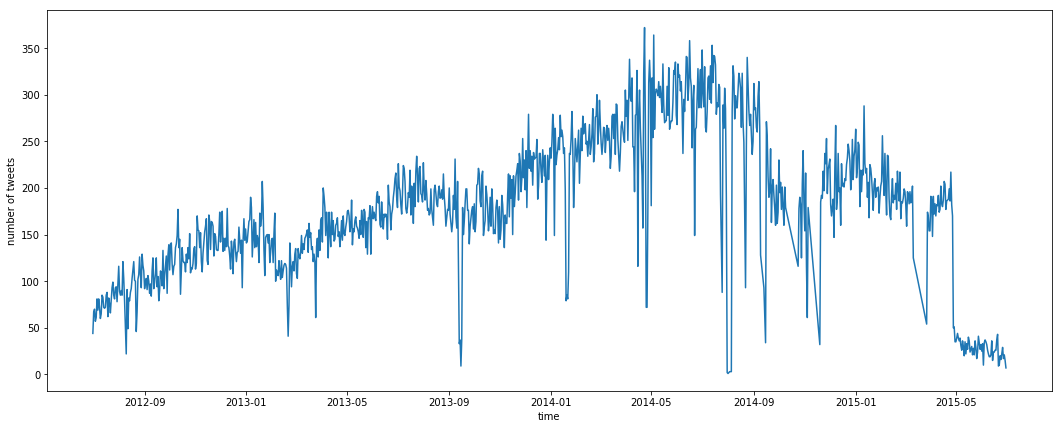

In [23]:
# Solution
plt.figure(figsize=[18, 7])
plt.plot(tweets_by_date['date'], tweets_by_date['number of tweets'])
plt.xlabel('time')
plt.ylabel('number of tweets')
plt.title('')

## Number of tweets by tract - Barplots
### Grouping tweets by census tract
Remember how we grouped tweets by date? Do the same, but this time, group instead by ```tract```. Set the output equal to a variable called ```tweets_by_tract```.

In [ ]:
...
tweets_by_tract.head()

In [26]:
# Solution
tweets_by_tract = tweets.groupby(by="tract").count()
tweets_by_tract.head()

,id,u_id,lat,lon,date,home_tract
tract,,,,,,
6.001400e+09,190,190,190,190,190,190
6.001400e+09,203,203,203,203,203,203
6.001400e+09,576,576,576,576,576,576
6.001400e+09,227,227,227,227,227,227
6.001400e+09,198,198,198,198,198,198


Pandas now sees the tracts as the indices, but we don't want that. Set the indices back to normal using ```reset_index()```, referencing the previous section.

In [ ]:
...
tweets_by_tract.head()

In [27]:
# Solution
tweets_by_tract = tweets_by_tract.reset_index()
tweets_by_tract.head()

,tract,id,u_id,lat,lon,date,home_tract
0,6.001400e+09,190,190,190,190,190,190
1,6.001400e+09,203,203,203,203,203,203
2,6.001400e+09,576,576,576,576,576,576
3,6.001400e+09,227,227,227,227,227,227
4,6.001400e+09,198,198,198,198,198,198


We only want the tract number and counts. Use ```.iloc[]``` to select only the first two columns.

In [ ]:
...
tweets_by_tract.head()

In [28]:
# Solution
tweets_by_tract = tweets_by_tract.iloc[:, 0:2]
tweets_by_tract.head()

,tract,id
0,6.001400e+09,190
1,6.001400e+09,203
2,6.001400e+09,576
3,6.001400e+09,227
4,6.001400e+09,198


Now we want to rename this ```id``` column to ```number of tweets```. Can you recall from the previous section how to do that?

In [ ]:
...
tweets_by_tract.head()

In [29]:
# Solution
tweets_by_tract.columns = ['tract', 'number of tweets']
tweets_by_tract.head()

,tract,number of tweets
0,6.001400e+09,190
1,6.001400e+09,203
2,6.001400e+09,576
3,6.001400e+09,227
4,6.001400e+09,198


### Sorting tweet counts in descending order
There are 360 tracts, which is too much to plot on one bar plot. Let's graph the top 10 tracts with the most tweets. 

First, let's set ```tweets_by_tract``` to a sorted version of itself. Use the function:

```<the dataframe>.sort_values(by=<column name>, ascending=False)```

which outputs a sorted dataframe, to do so.

In [ ]:
tweets_by_tract = ...
tweets_by_tract.head()

In [37]:
# Solution
tweets_by_tract = tweets_by_tract.sort_values(by="number of tweets", ascending=False)
tweets_by_tract.head()

,tract,number of tweets
94,6.001409e+09,3899
206,6.001435e+09,2748
251,6.001440e+09,1986
270,6.001442e+09,1910
133,6.001423e+09,1859


### Convert census tract numbers to strings
Currently, the census tracts are stored as integers. If you tried to plot with these, the barplot would not display correctly. Additionally, census tracts are not numerical data, but categorical data. So, instead we want to store each census tract as a **string**. We can use a list comprehension to do so!

Create a new column in ```tweets_by_tract``` named ```GEOID``` with these census tract strings.

*Important Hint:*
Make sure that the strings are of a specific format.
The tract numbers are currently of the **float** type, which means they have decimal points (e.g. 10.0). We want them to be **integers** (e.g. 10) before we convert them into strings.

You can use ```int()``` to convert a float first to an integer. Then use ```str()``` to convert the integer into a string! To do both at once, use ```str(int(...))```.

In [ ]:
...
tweets_by_tract.head()

In [151]:
tweets_by_tract['GEOID'] = [str(int(t)) for t in tweets_by_tract['tract']]
tweets_by_tract.head()       

,tract,number of tweets,GEOID
94,6.001409e+09,3899,6001409000
206,6.001435e+09,2748,6001435102
251,6.001440e+09,1986,6001440301
270,6.001442e+09,1910,6001441503
133,6.001423e+09,1859,6001422800


Now we want to plot the top 10 tracts with the highest counts. Use ```.loc[]``` to select the top 10 GEOID's and the top 10 tweet counts. Then use

```plt.barh(<the list, array, or series of x values>, <the y values>)```

to plot a horizonal bar plot. Make sure to add a labels to the x and y axes, as well as the title. Refer to the previous section for how to do so.

In [ ]:
top_10_tracts = ...
top_10_tweetcounts = ...
plt.figure(figsize=[18, 10])
...
...
...
...

<BarContainer object of 40 artists>

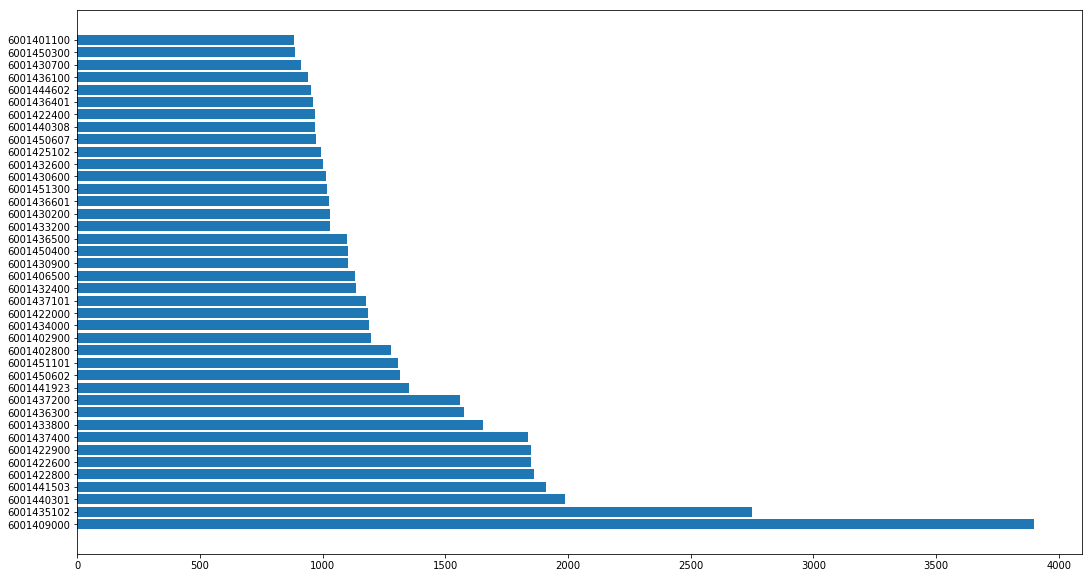

In [152]:
# Solution
top_10_tracts = tweets_by_tract.loc[:10, 'GEOID']
top_10_tweetcounts = tweets_by_tract.loc[:10, 'number of tweets']
plt.figure(figsize=[18, 10])
plt.barh(top_10_tracts, top_10_tweetcounts)
plt.xlabel('number of tweets')
plt.ylabel('census tract number')
plt.title()

## Moving on to GeoPandas: Visualizing number of tweets per census tract spatially
The bar plot is cool, but we're not any more enlightened than before, because most people don't memorize census tract numbers. A better way would be to analyze the data spatially, which means using GeoPandas!

Read in the alameda data from the previous lab. This contains the Shapely geometry polygons that we'll need to map our data.

In [138]:
alameda = gpd.read_file('alameda_shapefiles')
alameda.head()

,AFFGEOID,ALAND,ALAND_1,AWATER,AWATER_1,COUNTYFP,COUNTYFP_1,FID_1,FUNCSTAT,GEOID,...,female,male,medianage,mergeid,pct_20to64,pct_over64,pct_pov,pct_und_20,total_pop,geometry
0,1400000US06001400600,297856.0,297856.0,0.0,0.0,001,001,275.0,S,06001400600,...,1020.0,730.0,34.4,06001400600,78.2,9.8,8.3,12.0,1750.0,"POLYGON ((-122.26807 37.844136, -122.26514 37...."
1,1400000US06001400900,420877.0,420877.0,0.0,0.0,001,001,297.0,S,06001400900,...,1106.0,925.0,38.9,06001400900,71.0,7.7,12.0,21.0,2031.0,"POLYGON ((-122.285576 37.839778, -122.283186 3..."
2,1400000US06001401400,758241.0,758241.0,0.0,0.0,001,001,239.0,S,06001401400,...,2170.0,2127.0,31.3,06001401400,64.7,8.2,41.7,27.1,4297.0,"POLYGON ((-122.278611 37.826878, -122.268563 3..."
3,1400000US06001403000,352394.0,352394.0,0.0,0.0,001,001,258.0,S,06001403000,...,1445.0,1026.0,58.3,06001403000,47.9,43.8,30.2,8.3,2471.0,"POLYGON ((-122.274757 37.79883299999999, -122...."
4,1400000US06001405902,487280.0,487280.0,0.0,0.0,001,001,746.0,S,06001405902,...,1713.0,1808.0,31.5,06001405902,58.6,10.0,31.0,31.5,3521.0,"POLYGON ((-122.247175 37.789913, -122.243512 3..."


We don't need all of these columns. Use ```.loc[]``` to select only the columns named:
GEOID, female, male, medianage, total_pop, and geometry.

In [154]:
alameda = alameda.loc[:, ['GEOID', 'female', 'male', 'medianage', 'total_pop', 'geometry']]
alameda.head()

,GEOID,female,male,medianage,total_pop,geometry
0,06001400600,1020.0,730.0,34.4,1750.0,"POLYGON ((-122.26807 37.844136, -122.26514 37...."
1,06001400900,1106.0,925.0,38.9,2031.0,"POLYGON ((-122.285576 37.839778, -122.283186 3..."
2,06001401400,2170.0,2127.0,31.3,4297.0,"POLYGON ((-122.278611 37.826878, -122.268563 3..."
3,06001403000,1445.0,1026.0,58.3,2471.0,"POLYGON ((-122.274757 37.79883299999999, -122...."
4,06001405902,1713.0,1808.0,31.5,3521.0,"POLYGON ((-122.247175 37.789913, -122.243512 3..."


### Merging dataframes
Notice how the ```alameda``` dataset contains a variety of values by GEOID. Conveniently, so does our ```tweets_per_tract``` dataset! If we simply add the tweet counts to the alameda dataset, we would be able to plot a chloropleth map on the number of tweets per census tract.

To do so, we're going to perform an operation called a **merge** or **join**. We're going to perform the join on the ```GEOID``` column, so that the tweet count data corresponds correctly to the right census tract.

First, we need to fix a slight problem. The ```alameda GEOID``` column values have a 0 before, while the ```tweets_by_tract GEOID``` column values don't. This is easy, we can just concatenate a '0' in front of each census tract number in ```tweets_by_tract``` using a list comprehension.

Below is a quick review on how string concatenation works.

In [155]:
"pineapple" + "pen"

'pineapplepen'

In [ ]:
tweets_by_tract['GEOID'] = ...
tweets_by_tract.head()

In [156]:
# Solution
tweets_by_tract['GEOID'] = ['0' + str(int(t)) for t in tweets_by_tract['tract']]
tweets_by_tract.head()

,tract,number of tweets,GEOID
94,6.001409e+09,3899,06001409000
206,6.001435e+09,2748,06001435102
251,6.001440e+09,1986,06001440301
270,6.001442e+09,1910,06001441503
133,6.001423e+09,1859,06001422800


Time to merge! Use the function

```<a dataframe>.merge(<another dataframe>, on=<column name to merge on>)```

and set the output equal to variable called ```combined```.

In [ ]:
...
combined.head()

In [141]:
# Solution
combined = alameda.merge(tweets_by_tract, on='GEOID')
combined.head()

,GEOID,female,male,medianage,total_pop,geometry,tract,number of tweets
0,06001400600,1020.0,730.0,34.4,1750.0,"POLYGON ((-122.26807 37.844136, -122.26514 37....",6.001401e+09,320
1,06001400900,1106.0,925.0,38.9,2031.0,"POLYGON ((-122.285576 37.839778, -122.283186 3...",6.001401e+09,135
2,06001401400,2170.0,2127.0,31.3,4297.0,"POLYGON ((-122.278611 37.826878, -122.268563 3...",6.001401e+09,681
3,06001403000,1445.0,1026.0,58.3,2471.0,"POLYGON ((-122.274757 37.79883299999999, -122....",6.001403e+09,497
4,06001405902,1713.0,1808.0,31.5,3521.0,"POLYGON ((-122.247175 37.789913, -122.243512 3...",6.001406e+09,248


Recall the chloropleths we created in the last lab. Now create a chloropleth map of the number of tweets per census tract.

Reference:
```<the geodataframe>.plot(column=<column name>, legend=True, figsize=[18, 10])```

Remember to add a title and remove the axes.

In [ ]:
...
...
...

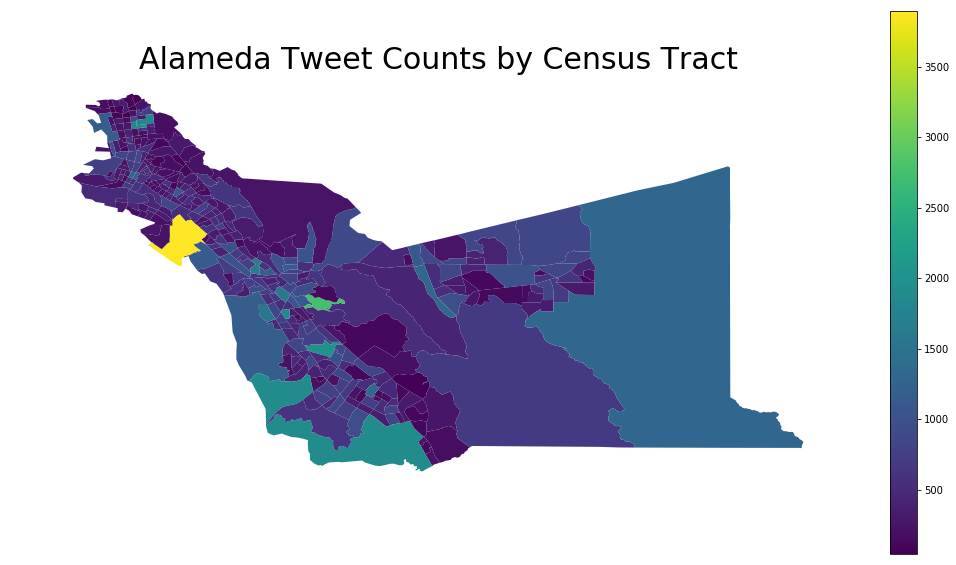

In [145]:
# Solution
combined.plot(column = 'number of tweets', legend = True, figsize=[18, 10])
plt.title('Alameda Tweet Counts by Census Tract', fontsize = 30)
plt.axis('off');

This looks so much better than the bar plot! But what if some census tracts only have a lot of tweets because they have a larger population size? Instead, we should plot number of tweets per capita.

Make a new column in ```combined``` called ```avg tweets per capita```. Set it equal to ```number of tweets``` divided by ```total_pop```. Then plot the new chloropleth map. Remember to add the title and remove the axes.

In [ ]:
...
...
...
...

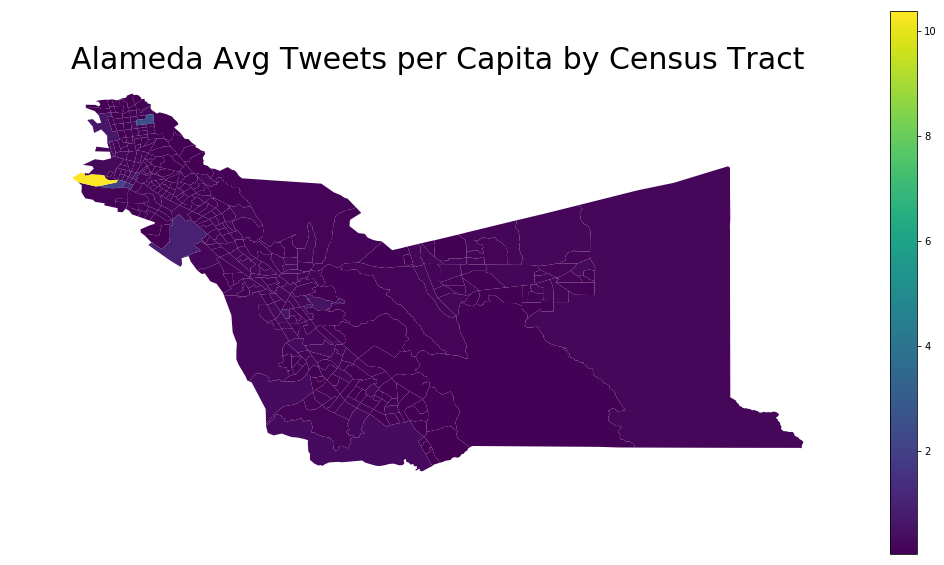

In [157]:
combined["avg tweets per capita"] = combined["number of tweets"] / combined["total_pop"]
combined.plot(column = 'avg tweets per capita', legend = True, figsize=[18, 10])
plt.title('Alameda Avg Tweets per Capita by Census Tract', fontsize = 30)
plt.axis('off');

These are by no means the only visualizations you can create with the ```combined``` dataset. In the cell below, create your own visualization! 

In [ ]:
# Your own visualization here

## Feedback form
Thank you for exploring data science with us! It would be wonderful if you could leave us feedback here:

https://docs.google.com/forms/d/e/1FAIpQLSe54U3E64kYFWwQHSUpAvWYMuJOdKzbHDZjPa3nMUlHSSs0PQ/viewform


## Resources
If you're interested in exploring more about data science, Berkeley's [Data 8](https://www.inferentialthinking.com/chapters/intro.html) and [Data 100](https://www.textbook.ds100.org/) textbooks are very well-written with interactive links to follow along.

There are also websites like [DataCamp](https://www.datacamp.com/courses) and [DataQuest](https://www.dataquest.io/course/python-for-data-science-fundamentals/) that offer online interactive courses in R, Python, and SQL, many of them for free.

If you're stuck trying to work on a project, [Data Peer Consulting](https://data.berkeley.edu/education/data-peer-consulting) at the Division of Data Sciences could be helpful to you.

If you're looking for more specialized help, the [D-lab](https://dlab.berkeley.edu/) which focuses on data science applications to the social sciences specifically, holds [workshops](https://dlab.berkeley.edu/training) and [consulting](https://dlab.berkeley.edu/consulting), many on geospatial data.

---
### Author: Rebekah Tang

### References:
- GeoPandas Mapping Documentation: http://geopandas.org/mapping.html
- Pandas Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
- Matplotlib Documentation: https://matplotlib.org/api/pyplot_summary.html